In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lbow.oneDimensional.steadystate import HalfPlaneModel
from helper_functions import effective_wavelength

In [3]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Produce figure 5

Produce figure 5 which depicts the relation between apparent wavelength and Froude number.

Copyright 2023 Dries Allaerts

Licensed under the Apache License, Version 2.0.

## Define some functions

In [4]:
def wavelength(U,N,L,z,verbose=False):
    # Hill shape
    hmax = 0.1*L                     # Height of the hill [m]
    h = lambda x: hmax/(1+(x/L)**2)  # Shape function of the hill
    
    # Numerical parameters
    Lx = 2000 * L                    # Length of the numerical domain [m]
    Nx = 2*int(1e4)                  # Number of grid points
    
    # Numerical grid
    xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
    if verbose: print('Horizontal grid resolution is {} m'.format(dx))
    
    model = HalfPlaneModel(xs,h(xs),U,N)
    w = model.solve('w',z,space='real')
    return effective_wavelength(w,dx)

## Generate data

In [5]:
Fr = np.linspace(0,2,41)
Fr = Fr[1:]
Fr = np.array([0.001]+[i for i in Fr])
N = 0.01
L = 1000
U = Fr*N*L

lh_z1 = np.zeros(Fr.size)
lh_z2 = np.zeros(Fr.size)
lh_z3 = np.zeros(Fr.size)
lh_z4 = np.zeros(Fr.size)
lh_z5 = np.zeros(Fr.size)
for i, Ui in enumerate(U):
    Ls = 2*np.pi*Ui/N
    lh_z1[i] = wavelength(Ui,N,L,0*Ls)
    lh_z2[i] = wavelength(Ui,N,L,0.08*Ls)
    lh_z3[i] = wavelength(Ui,N,L,0.1*Ls)
    lh_z4[i] = wavelength(Ui,N,L,0.16*Ls)
    lh_z5[i] = wavelength(Ui,N,L,0.5*Ls)

LES data

In [6]:
U_LES = np.array([5, 10, 12, 14, 20, 25, 30])
N_LES = np.array([0.02, 0.04, 0.016, 0.0112, 0.008, 0.006667, 0.006])
L_LES = np.array([25e3, 2.5e3, 2.5e3, 2.5e3, 2.5e3, 2.5e3, 2.5e3])
z_LES = np.array([500, 2.5e3, 2.5e3, 2.5e3, 2.5e3, 2.5e3, 2.5e3])
lambda_LES = np.array([76.8e3, 8.8e3, 8.6e3, 10e3, 18.16e3, 22.88e3, 21.24e3])
Ls_LES = 2*np.pi*U_LES/N_LES
Fr_LES = U_LES/N_LES/L_LES
zNU_LES = z_LES*N_LES/U_LES
zLs_LES = z_LES/Ls_LES

## Visualization

In [7]:
from scipy import optimize
f = lambda y: 3*np.sin(y)*(2-y**2)-y*np.cos(y)*(6-y**2)
sol = optimize.root_scalar(f,x0=4,bracket=[2,6])
print(sol.root)

3.870238580222165


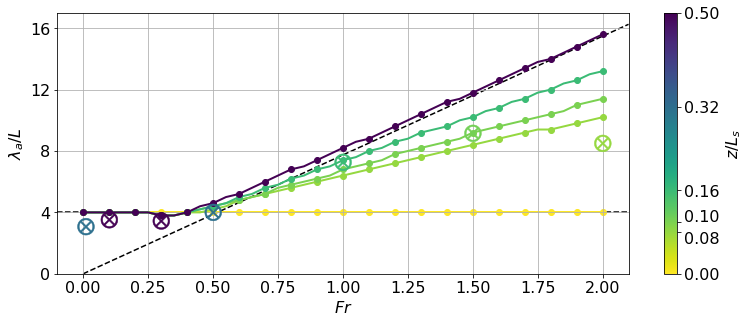

In [8]:
f,ax = plt.subplots(1,1,figsize=(12.8,4.8))

norm = mpl.colors.Normalize(vmin=0, vmax=0.5)
# Data from linear theory
ax.plot(Fr,lh_z5/(L),'-o',label=r'$z/L_s=0.50$',lw=2,zorder=5,markevery=2,color=plt.cm.viridis_r(norm(0.5)))
ax.plot(Fr,lh_z4/(L),'-o',label=r'$z/L_s=0.16$',lw=2,zorder=4,markevery=2,color=plt.cm.viridis_r(norm(0.16)))
ax.plot(Fr,lh_z3/(L),'-o',label=r'$z/L_s=0.10$',lw=2,zorder=3,markevery=2,color=plt.cm.viridis_r(norm(0.1)))
ax.plot(Fr,lh_z2/(L),'-o',label=r'$z/L_s=0.08$',lw=2,zorder=2,markevery=2,color=plt.cm.viridis_r(norm(0.08)))
ax.plot(Fr,lh_z1/(L),'-o',label=r'$z/L_s=0.00$',lw=2,zorder=1,markevery=2,color=plt.cm.viridis_r(norm(0)))
# LES data
scatterplot = plt.scatter(Fr_LES, lambda_LES/L_LES,
                          c=zLs_LES,cmap='viridis_r',
                          norm=norm, s=300,
                          marker=r'$\bigotimes$',#\bigtriangleup #\Phi
                          facecolors='none',lw=0.5,
                          zorder=6)
# Asymptote
ax.plot([0,2.1],[0,2*2.1*sol.root],'--k',lw=1.5,zorder=0) #Wavelength with x0=3.87U/N
ax.plot([-0.1,2.1],[4,4],'--k',lw=1.5,zorder=0)
# Figure mark up
_ = ax.set(xlabel=r'$\mathit{Fr}$',ylabel=r'$\lambda_a/L$',xlim=[-0.1,2.1],ylim=[0,17],
          yticks=[0,4,8,12,16])
cbar = f.colorbar(scatterplot, ax=ax, label=r'$z/L_s$',ticks=[0,0.08,0.1,0.16,0.32,0.5])
cbar.ax.get_yticklabels()[1].set_verticalalignment('top')
cbar.ax.get_yticklabels()[2].set_verticalalignment('baseline')
#ax.legend(fontsize=13)
ax.grid('on')

plt.savefig(os.path.join('Figures','wavelengthFr_w_LES.png'),bbox_inches='tight')
plt.savefig(os.path.join('Figures','wavelengthFr_w_LES.pdf'),bbox_inches='tight')